# Examples of optimizing a six hump

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform
import math

In [38]:
param_dict = {
        'x': uniform(-3, 6),
        'y': uniform(-2, 4),
    }


x_opt = 0.0898 # or -0.0898
y_opt = -0.7126  # or 0.7126

In [3]:
def camel(x,y):
        x2 = math.pow(x,2)
        x4 = math.pow(x,4)
        y2 = math.pow(y,2)
        return (4.0 - 2.1 * x2 + (x4 / 3.0)) * x2 + x*y + (-4.0 + 4.0 * y2) * y2

In [4]:
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        y = hyper_par['y']
        result = - camel(x, y)
        results.append(result)
    return results

In [31]:
conf_Dict = dict()
conf_Dict['batch_size'] = 5
conf_Dict['num_iteration'] = 20
conf_Dict['domain_size'] = 10000

In [32]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
results = tuner.maximize()

In [41]:
print('best parameters:',results['best_params'])
print('best accuracy:',results['best_objective'])

best parameters: {'x': 0.03939144819341944, 'y': -0.7839283516697364}
best accuracy: 0.9721973825865092


In [42]:
x_opt = 0.0898 # or -0.0898
y_opt = -0.7126  # or 0.7126

print("Real x_opt and y_opt are:",x_opt,y_opt)
print("optimal objective:",-camel(x_opt,x_opt))

Real x_opt and y_opt are: 0.0898 -0.7126
optimal objective: -0.008187769406254222


# Using the tuner trained surrogate function for inspection

In [43]:
ds = tuner.ds
ds.domain_size = 50000
domain_list = ds.get_domain()
X_domain_np = ds.convert_GP_space(domain_list)
Optimizer = tuner.Optimizer
pred_y,sigma = Optimizer.predict(X_domain_np)
x_opt = X_domain_np[np.argmax(pred_y)][0]
y_opt = X_domain_np[np.argmax(pred_y)][1]
print(x_opt,y_opt,-camel(x_opt,y_opt))

0.1329182495397525 -0.826256531433609 0.9062922177061893


# Plotting the actual variation in objective values of the tried results

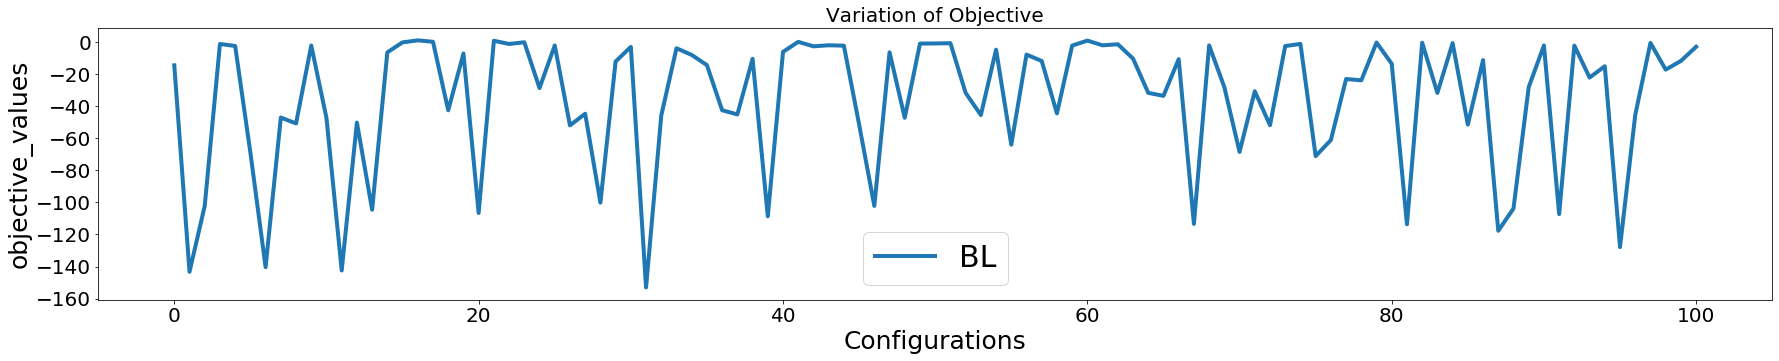

In [44]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

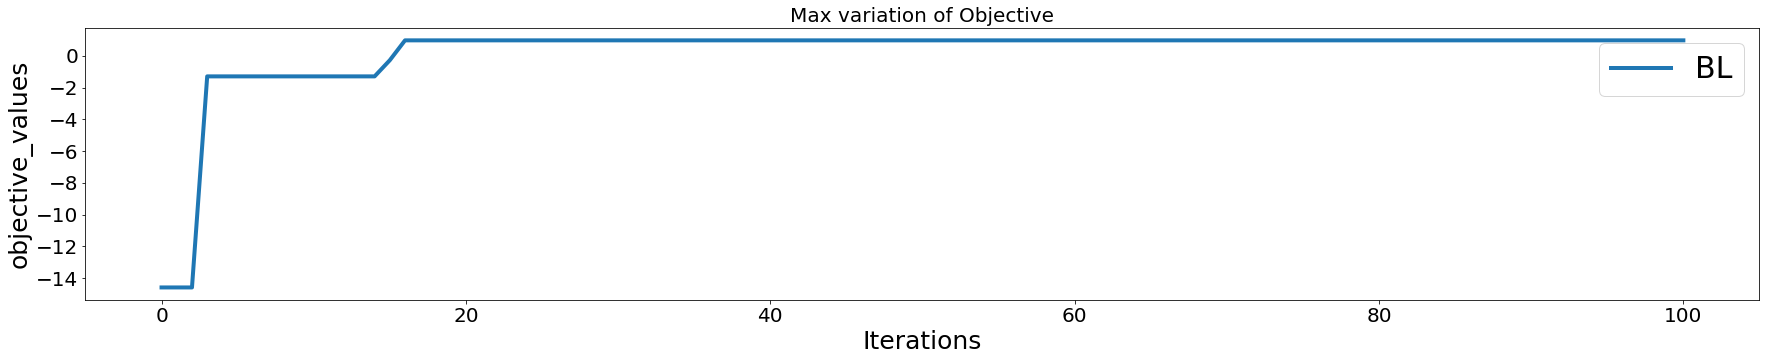

In [45]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()